# Straxferno 0: Using strax

 Why does your notebook crash if you try to load raw_records for a normal one-hour run? What options do you have available to do analysis on low-level data?

In [2]:
import straxen
st = straxen.contexts.xenonnt_online()

In [5]:
run_id = '007695'

In [ ]:
# st.select_runs()


seconds_range

In [20]:
st.size_mb(run_id, 'raw_records') 

116145.769

In [15]:
st.get_df?

Signature:
st.get_df(
    run_id: Union[str, tuple, list],
    targets,
    save=(),
    max_workers=None,
    **kwargs,
) -> pandas.core.frame.DataFrame
Docstring:
Compute target for run_id and return as pandas DataFrame
        
:param run_id: run id to get
:param targets: list/tuple of strings of data type names to get
:param save: extra data types you would like to save
    to cache, if they occur in intermediate computations.
    Many plugins save automatically anyway.
:param max_workers: Number of worker threads/processes to spawn.
    In practice more CPUs may be used due to strax's multithreading.

:param selection_str: Query string or sequence of strings to apply.
:param time_range: (start, stop) range to load, in ns since the epoch
:param seconds_range: (start, stop) range of seconds since
the start of the run to load.
:param time_within: row of strax data (e.g. event) to use as time range
:param time_selection: Kind of time selectoin to apply:
- fully_contained: (default) se

In [11]:
st.size_mb??

Signature: st.size_mb(run_id, target)
Source:   
    def size_mb(self, run_id, target):
        """Return megabytes of memory required to hold data"""
        md = self.get_meta(run_id, target)
        return sum([x['nbytes'] for x in md['chunks']]) / 1e6
File:      ~/software/strax/strax/context.py
Type:      method


In [12]:
st.data_info('raw_records')

,Field name,Data type,Comment
0,time,int64,Start time since unix epoch [ns]
1,length,int32,Length of the interval in samples
2,dt,int16,Width of one sample [ns]
3,channel,int16,Channel/PMT number
4,pulse_length,int32,Length of pulse to which the record belongs (w...
5,record_i,int16,Fragment number in the pulse
6,baseline,int16,Baseline determined by the digitizer (if this ...
7,data,"('<i2', (110,))",Waveform data in raw ADC counts


In [57]:
# st.get_metadata(run_id, 'raw_records')

In [48]:
r = st.get_array(run_id, 'raw_records', seconds_range=(50, 52))
r.nbytes / 1e6

64.516528

#### get_iter

In [27]:
# for run_id in runs:
for r in st.get_iter(run_id, 'raw_records'):
    print(len(r))

724769
722470
722911


KeyboardInterrupt: 

In [33]:
#r.start, r.end, dir(r)

(array([64976., 56607., 72958., 62204., 65269., 68583., 92185., 69869.,
        93968., 76292.]),
 array([  0. ,  49.3,  98.6, 147.9, 197.2, 246.5, 295.8, 345.1, 394.4,
        443.7, 493. ]),
 <a list of 10 Patch objects>)

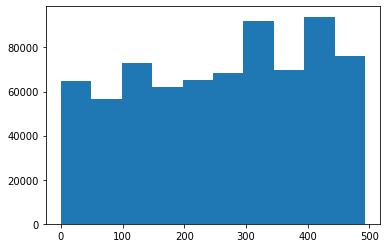

In [30]:
#r, type(r)
import matplotlib.pyplot as plt
plt.hist(r.data['channel'])

In [35]:
selection_str = 'channel == 141'
r = st.get_array(run_id, 'raw_records', selection_str=selection_str, seconds_range=(0, 60))

In [36]:
r.nbytes / 1e6

16.205504

In [40]:
for x in 'channel':
    print(x)

c
h
a
n
n
e
l


In [39]:
r = st.get_array(run_id, 'raw_records', keep_columns=['channel'], seconds_range=(0, 60))
r

array([(172,), (424,), (353,), ..., (119,), (282,), (374,)],
      dtype=[(('Channel/PMT number', 'channel'), '<i2')])

In [41]:
acc = st.accumulate(
    run_id, 
    'raw_records',
    seconds_range=(0, 60),
    selection_str='(channel == 126) & (record_i == 0)')
acc['n_rows']

4802

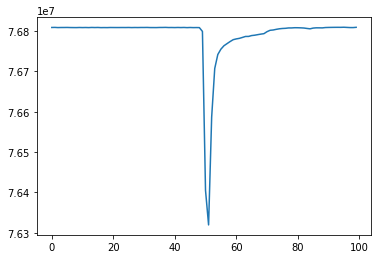

In [47]:
plt.plot(acc['data'][:100])
#plt.xlim(0, 90)


Someone announces on gitter that the straxen processing algorithms have just been updated. Looking in your notebook, you see the data you want to load is not available anymore. What is the most likely cause? What options do you have for accessing the data anyway?


In [50]:
st.config

{'n_tpc_pmts': 494,
 'gain_model': ('to_pe_constant', '1300V_20200428'),
 'channel_map': immutabledict({'tpc': (0, 493), 'he': (500, 752), 'aqmon': (790, 807), 'tpc_blank': (999, 999), 'mv': (1000, 1083), 'mv_blank': (1999, 1999)})}

In [56]:
st.key_for(run_id, 'peak_basics')

007695-peak_basics-yoanu63jrg

In [55]:
st.lineage(run_id, 'peak_basics')

{'peak_basics': ('PeakBasics', '0.0.6', {'n_top_pmts': 127}),
 'peaks': ('Peaks', '0.1.1', {}),
 'lone_hits': ('Peaklets',
  '0.3.2',
  {'n_tpc_pmts': 494,
   'gain_model': ('to_pe_constant', '1300V_20200428'),
   'peaklet_gap_threshold': 350,
   'peak_left_extension': 30,
   'peak_right_extension': 200,
   'peak_min_pmts': 4,
   'peak_split_gof_threshold': (None,
    ((0.5, 1), (3.5, 0.25)),
    ((2, 1), (4.5, 0.4))),
   'peak_split_filter_wing_width': 70,
   'peak_split_min_area': 40.0,
   'peak_split_iterations': 20,
   'tight_coincidence_window_left': 50,
   'tight_coincidence_window_right': 50,
   'hit_min_amplitude': 'pmt_commissioning_initial'}),
 'pulse_counts': ('PulseProcessing',
  '0.2.1',
  {'n_tpc_pmts': 494,
   'hev_gain_model': ('disabled', None),
   'baseline_samples': 40,
   'tail_veto_threshold': 0,
   'tail_veto_duration': 3000000,
   'tail_veto_resolution': 1000,
   'tail_veto_pass_fraction': 0.05,
   'tail_veto_pass_extend': 3,
   'pmt_pulse_filter': None,
   'save

In [54]:
st.get_metadata(run_id, 'peak_basics')['lineage']

{'lone_hits': ['Peaklets',
  '0.3.2',
  {'gain_model': ['to_pe_constant', '1300V_20200428'],
   'hit_min_amplitude': 'pmt_commissioning_initial',
   'n_tpc_pmts': 494,
   'peak_left_extension': 30,
   'peak_min_pmts': 4,
   'peak_right_extension': 200,
   'peak_split_filter_wing_width': 70,
   'peak_split_gof_threshold': [None,
    [[0.5, 1], [3.5, 0.25]],
    [[2, 1], [4.5, 0.4]]],
   'peak_split_iterations': 20,
   'peak_split_min_area': 40.0,
   'peaklet_gap_threshold': 350,
   'tight_coincidence_window_left': 50,
   'tight_coincidence_window_right': 50}],
 'merged_s2s': ['MergedS2s',
  '0.0.0',
  {'s2_merge_max_area': 5000.0,
   's2_merge_max_duration': 15000,
   's2_merge_max_gap': 3500}],
 'peak_basics': ['PeakBasics', '0.0.6', {'n_top_pmts': 127}],
 'peaklet_classification': ['PeakletClassification',
  '0.2.0',
  {'s1_max_rise_time': 60,
   's1_max_rise_time_post100': 150,
   's1_min_coincidence': 3,
   's2_min_pmts': 4}],
 'peaks': ['Peaks', '0.1.1', {}],
 'pulse_counts': ['Pul

In [51]:
p = st.get_array(run_id, 'peak_basics')

In [52]:
st.show_config('peak_basics')

,option,default,current,applies_to,help
0,n_top_pmts,127,<OMITTED>,"(peak_basics,)",Number of top PMTs
1,diagnose_sorting,False,<OMITTED>,"(peaks,)",Enable runtime checks for sorting and disjoint...
2,peaklet_gap_threshold,350,<OMITTED>,"(peaklets, lone_hits)",No hits for this many ns triggers a new peak
3,peak_left_extension,30,<OMITTED>,"(peaklets, lone_hits)",Include this many ns left of hits in peaks
4,peak_right_extension,200,<OMITTED>,"(peaklets, lone_hits)",Include this many ns right of hits in peaks
5,peak_min_pmts,4,<OMITTED>,"(peaklets, lone_hits)",Minifnmum contributing PMTs needed to define a...
6,peak_split_gof_threshold,"(None, ((0.5, 1), (3.5, 0.25)), ((2, 1), (4.5,...",<OMITTED>,"(peaklets, lone_hits)",Natural breaks goodness of fit/split threshold...
7,peak_split_filter_wing_width,70,<OMITTED>,"(peaklets, lone_hits)",Wing width of moving average filter for low-sp...
8,peak_split_min_area,40,<OMITTED>,"(peaklets, lone_hits)",Minimum area to evaluate natural breaks criter...
9,peak_split_iterations,20,<OMITTED>,"(peaklets, lone_hits)",Maximum number of recursive peak splits to do.


Why can you not load peak_basics and event_info together in one get_array or get_df call? How else can you compute e.g. the sum area of S2s in an event?

In [70]:
st2 = straxen.contexts.xenon1t_dali()
run_id = '180215_1029'

In [66]:
st2.is_stored(run_id, 'event_info')

True

In [82]:
events = st2.get_array(run_id, 'event_info')
peaks = st2.get_array(run_id, 'peak_basics')

In [92]:
strax.fully_contained_in(peaks, events)[:200]

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0,  0,  0,  0,  0,
        0,  0,  0,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int32)

In [84]:
import strax
list_stuff = strax.split_by_containment(peaks, events)

In [89]:
#list_stuff[3]

In [81]:
for event in events:
    print(len(st2.get_array(run_id, 'peak_basics', time_within=event)))

9
19
66
10
6
18
15
10
8
23
47
34
7
6
17
4
4
8
28
14
12
3
19
3
3
14
10
4
26
37
37
31
20
10
5
23
13
6
16
11
28
35
4
3
26
5
16
1
22
18
4
17
17
18
74
34
30
5
4
20
20
14
12
14
124
11
27
7
16
10
12
10
13
7
11
12
39
3
8
13
9
8
83
5
76
6
14
5
2
9
38
14
12
15
23
17
9
7
87
13
25
18
19
7
9
75
4
75
1
62
56
10
28
7
18
9
4
60
18
9
12
8
12
5
5
13
11
39
15
6
21
4
10
8
14
5
8
27
5
68
26
5
11
15
24
5
73
22
9
26
3
6
7
36
10
17
58
27
14
7
17
7
7
13
12
16
3
8
34
1
16
10
101
25
8
16
15
7
17
17
10
15
9
11
15
14
61
16
3
103
14
16
37
9
8
30
4
12
5
11
6
19
3
13
17
19
89
3
37
13
17
23
8
24
21
6
7
10
10
18
6
5
7
11
16
6
14
7
12
12
13
8
12
10
27
16
47
17
118
5
19
3
29
4
24
13
8
6
11
7
7
10
18
13
4
4
2
62
59
9
11
43
6
17
7
52
9
14
23
64
16
35
7
14
30
19
7
33
6
35
5
3
7
9
8
6
15
4
28
10
20
26
11
20
4
13
146
9
18
20
27
12
13
73
2
2
5


In [67]:
st.get_df(run_id, ['peak_basics', 'event_info'])

RuntimeError: Cannot automerge different data kinds!